In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Train directory: Tomato Leaf Disease\train
Test directory : Tomato Leaf Disease\test
Found 15064 files belonging to 10 classes.
Kelas: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


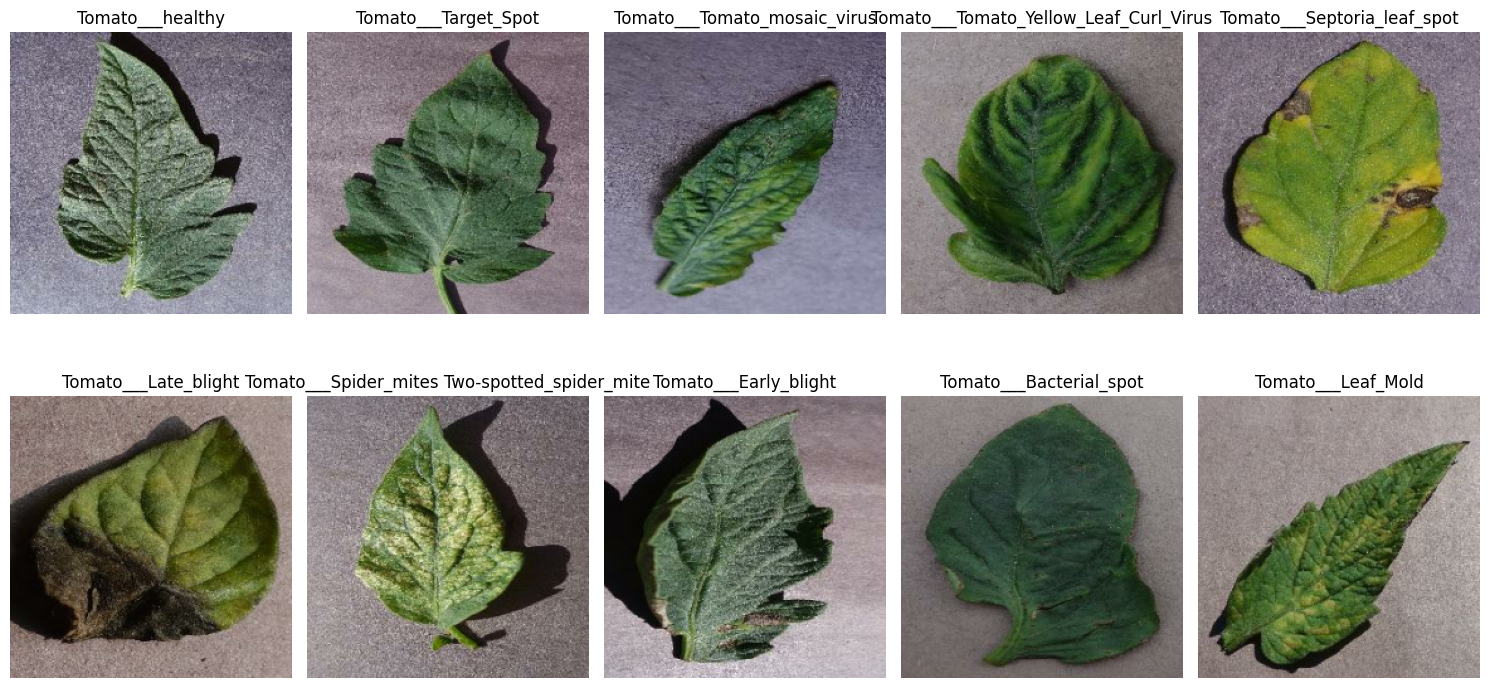

In [29]:

import os

dataset_path = "Tomato Leaf Disease"
train_dir = os.path.join(dataset_path, "train")
test_dir  = os.path.join(dataset_path, "test")

print("Train directory:", train_dir)
print("Test directory :", test_dir)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=50,     # lebih besar supaya dapat semua kelas
    shuffle=True
)

class_names = train_ds.class_names
print("Kelas:", class_names)

# Ambil batch pertama
for images, labels in train_ds.take(1):
    plt.figure(figsize=(15, 8))

    shown_classes = set()
    index = 1

    for i in range(len(images)):
        label = labels[i].numpy()
        class_name = class_names[label]

        # Tampilkan hanya 1 gambar per kelas
        if class_name not in shown_classes:
            plt.subplot(2, 5, index)   # 2 baris x 5 kolom = 10 gambar
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")

            shown_classes.add(class_name)
            index += 1

        # Jika sudah 10 kelas, stop
        if len(shown_classes) == 10:
            break

    plt.tight_layout()
    plt.show()
    break


In [30]:
import numpy as np

def load_bmp_manual(path):
    with open(path, 'rb') as f:
        data = f.read()

    # baca lebar & tinggi (BMP little-endian)
    width  = data[18] + (data[19] << 8)
    height = data[22] + (data[23] << 8)

    # offset pixel mulai dari byte 54
    offset = 54  
    row_size = (width * 3 + 3) & ~3  # BMP padding ke kelipatan 4 byte

    img = np.zeros((height, width, 3), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            pos = offset + y * row_size + x * 3
            b = data[pos]
            g = data[pos + 1]
            r = data[pos + 2]
            img[height - 1 - y, x] = [r, g, b]  # BMP dari bawah

    return img


In [31]:
def resize_manual(img, new_w, new_h):
    old_h, old_w, _ = img.shape
    result = np.zeros((new_h, new_w, 3), dtype=np.uint8)

    for y in range(new_h):
        for x in range(new_w):
            old_x = int(x * old_w / new_w)
            old_y = int(y * old_h / new_h)
            result[y, x] = img[old_y, old_x]

    return result


In [32]:
def normalize_manual(img):
    return img.astype(np.float32) / 255.0


In [33]:
def flip_horizontal_manual(img):
    return img[:, ::-1]


In [34]:
def rotate_90_manual(img):
    return np.rot90(img)
  

In [35]:
def zoom_manual(img, factor=1.1):
    h, w, _ = img.shape
    nh, nw = int(h/factor), int(w/factor)

    start_y = (h - nh)//2
    start_x = (w - nw)//2

    cropped = img[start_y:start_y+nh, start_x:start_x+nw]
    return resize_manual(cropped, w, h)


In [36]:

def load_train_manual(folder, size=(224,224)):
    X = []
    y = []

    class_names = os.listdir(folder)

    for label, cname in enumerate(class_names):
        cpath = os.path.join(folder, cname)

        for file in os.listdir(cpath):
            if file.endswith(".bmp"):
                path = os.path.join(cpath, file)

                img = load_bmp_manual(path)
                img = resize_manual(img, size[0], size[1])

                # augmentasi
                X.append(normalize_manual(img))
                X.append(normalize_manual(flip_horizontal_manual(img)))
                X.append(normalize_manual(rotate_90_manual(img)))
                X.append(normalize_manual(zoom_manual(img)))

                y += [label]*4

    return np.array(X), np.array(y)


In [37]:
def load_test_manual(folder, size=(224,224)):
    X = []
    y = []

    class_names = os.listdir(folder)

    for label, cname in enumerate(class_names):
        cpath = os.path.join(folder, cname)

        for file in os.listdir(cpath):
            if file.endswith(".bmp"):
                path = os.path.join(cpath, file)

                img = load_bmp_manual(path)
                img = resize_manual(img, size[0], size[1])
                img = normalize_manual(img)

                X.append(img)
                y.append(label)

    return np.array(X), np.array(y)


In [38]:
train_dir = "Tomato Leaf Disease/train"
test_dir  = "Tomato Leaf Disease/test"

X_train, y_train = load_train_manual(train_dir)
X_test, y_test   = load_test_manual(test_dir)

print("Train:", X_train.shape, "Label:", y_train.shape)
print("Test :", X_test.shape, "Label:", y_test.shape)


Train: (0,) Label: (0,)
Test : (0,) Label: (0,)


In [ ]:
# Ambil 1 contoh gambar dari folder pertama
train_path = "Tomato Leaf Disease/train"
class_name = os.listdir(train_path)[0]
class_path = os.path.join(train_path, class_name)

# ambil satu file pertama
file = [f for f in os.listdir(class_path) if f.endswith(".bmp")][0]
img_path = os.path.join(class_path, file)

# --- Load gambar asli ---
original = load_bmp_manual(img_path)

# --- Preprocessing ---
resized = resize_manual(original, 224, 224)
flipped = flip_horizontal_manual(resized)
rotated = rotate_90_manual(resized)
zoomed  = zoom_manual(resized, factor=1.1)

# -------------------------
# TAMPILKAN SEBELUM–SESUDAH
# -------------------------
show_two("Original", original, "Resize", resized)
show_two("Resize", resized, "Flip", flipped)
show_two("Resize", resized, "Rotate 90°", rotated)
show_two("Resize", resized, "Zoom 10%", zoomed)


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/mnt/data/tomat/Tomato Leaf Disease/train'